!pip install xlrd pandas
!pip install bnlearn

# Bayesian Networks

In this notebool, we will use bnlearn package to generate Bayesian Networks, based on structure learning and parameter learning. The generated Bayesian Networks will be used for inference. Using bnlearn package to learn a Bayesian network can be split into two problems:

- Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.

- Parameter learning: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.

### Example: Building Bayesian Network and making inferences with Sprinkler data set

In [16]:
import bnlearn as bn

# load the Sprinkler dataset
df = bn.import_example()

df

[bnlearn] >Import dataset..


,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,1,0,1,1
996,1,0,1,1
997,1,0,1,1
998,0,0,0,0


# Structure Learning: obtaining the network structure

model = bn.structure_learning.fit(df)

G = bn.plot(model)

# learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df, methodtype="bayes")

# Make plot
G = bn.plot(model_update)

# performing inference
q_1 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Cloudy':1,'Sprinkler':0, 'Rain':1})
q_2 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Rain':1})

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

Learn a Bayesian Network of the artificial smart grid data set. Construct the network make inference for the following:

- P(Outage_Duration=Less_than_1H | Time=Morning, Demand_Factor=Medium)
- P(Demand_Factor=High | Overload=Yes, Weather=Cold)
- P(Number_of_Customers=Low | Demand_Factor=High)


In [4]:
import pandas as pd

file = "./smart_grid.xlsx"

df_sg = data = pd.read_excel(file)

print(df_sg.columns)
df_sg

Index(['Season', 'Outage_Duration', 'Number_of_Customers', 'Overload',
       'Weather', 'Time', 'Demand_Factor', 'Day'],
      dtype='object')


,Season,Outage_Duration,Number_of_Customers,Overload,Weather,Time,Demand_Factor,Day
0,Autumn,Less_than_1H,Low,Yes,Cold,Morning,Low,Weekdays
1,Winter,Less_than_1H,Low,No,Cold,Evening,Low,Weekdays
2,Spring,More_than_1H,Low,No,Cold,Evening,Low,Weekdays
3,Winter,Less_than_1H,High,No,Warm,Morning,Low,Weekdays
4,Spring,More_than_1H,Low,No,Cold,Morning,Low,Weekend
...,...,...,...,...,...,...,...,...
695,Autumn,Less_than_1H,Low,Yes,Cold,Afternoon,High,Weekend
696,Summer,More_than_1H,Low,No,Warm,Evening,Medium,Weekend
697,Winter,Less_than_1H,High,Yes,Cold,Evening,Medium,Weekdays
698,Autumn,More_than_1H,Low,No,Cold,Afternoon,High,Weekend


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


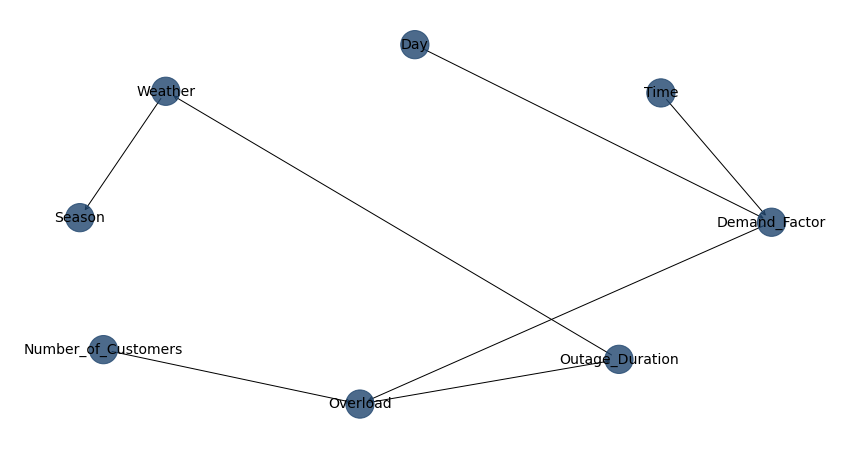

In [5]:
model = bn.structure_learning.fit(df_sg)

G = bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of Outage_Duration:
+-------------------------------+--------------------+---------------------+
| Overload                      | Overload(No)       | Overload(Yes)       |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(Less_than_1H) | 0.3964248159831756 | 0.5874499332443258  |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(More_than_1H) | 0.6035751840168244 | 0.41255006675567424 |
+-------------------------------+--------------------+---------------------+
[bnlearn] >CPD of Weather:
+-----------------+-----+-------------------------------+
| Outage_Duration | ... | Outage_Duration(More_than_1H) |
+-----------------+-----+-------------------------------+
| Weather( Cold)  | ... | 0.579841449603624             |
+-----------------+-----+--------------------------

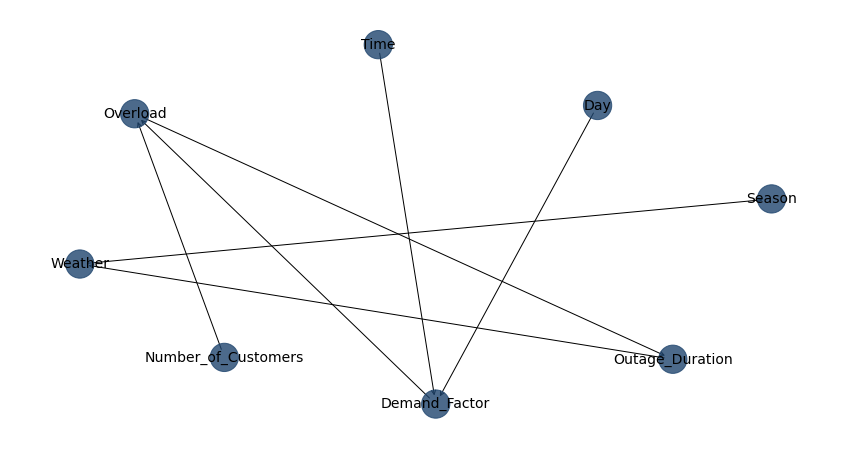

In [8]:
model_update = bn.parameter_learning.fit(model, df_sg, methodtype="bayes")
G = bn.plot(model_update)

In [11]:
#P(Outage_Duration=Less_than_1H | Time=Morning, Demand_Factor=Medium)
a = bn.inference.fit(model_update, variables =["Outage_Duration"], evidence={"Time":"Morning","Demand_Factor":"Medium"})
print(a)

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+-------------------+----------+
|    |   Outage_Duration |        p |
+====+===================+==========+
|  0 |                 0 | 0.482832 |
+----+-------------------+----------+
|  1 |                 1 | 0.517168 |
+----+-------------------+----------+
+-------------------------------+------------------------+
| Outage_Duration               |   phi(Outage_Duration) |
+===============================+========================+
| Outage_Duration(Less_than_1H) |                 0.4828 |
+-------------------------------+------------------------+
| Outage_Duration(More_than_1H) |                 0.5172 |
+-------------------------------+------------------------+


In [13]:
#P(Demand_Factor=High | Overload=Yes, Weather=Cold)
b = bn.inference.fit(model_update, variables=["Demand_Factor"], evidence={"Overload":"Yes","Weather":" Cold"})
print(b)

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+----+-----------------+----------+
|    |   Demand_Factor |        p |
+====+=================+==========+
|  0 |               0 | 0.367494 |
+----+-----------------+----------+
|  1 |               1 | 0.33314  |
+----+-----------------+----------+
|  2 |               2 | 0.299365 |
+----+-----------------+----------+
+-----------------------+----------------------+
| Demand_Factor         |   phi(Demand_Factor) |
+=======================+======================+
| Demand_Factor(High)   |               0.3675 |
+-----------------------+----------------------+
| Demand_Factor(Low)    |               0.3331 |
+-----------------------+----------------------+
| Demand_Factor(Medium) |               0.2994 |
+-----------------------+----------------------+


In [15]:
c = bn.inference.fit(model_update, variables=["Number_of_Customers"], evidence={"Demand_Factor":"High"})
print(c)


[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+-----------------------+----------+
|    |   Number_of_Customers |        p |
+====+=======================+==========+
|  0 |                     0 | 0.461176 |
+----+-----------------------+----------+
|  1 |                     1 | 0.538824 |
+----+-----------------------+----------+
+---------------------------+----------------------------+
| Number_of_Customers       |   phi(Number_of_Customers) |
+===========================+============================+
| Number_of_Customers(High) |                     0.4612 |
+---------------------------+----------------------------+
| Number_of_Customers(Low)  |                     0.5388 |
+---------------------------+----------------------------+
